In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv("pizza_sales.csv")

In [11]:
desc_stats = data.describe()
data_median = data.median(numeric_only=True)
data_mode = data.mode().iloc[0]  # Mode may return multiple values, take the first'

data_mode

pizza_id                                                           1.0
order_id                                                       10760.0
pizza_name_id                                               big_meat_s
quantity                                                           1.0
order_date                                                  26-11-2015
order_time                                                    12:32:00
unit_price                                                       20.75
total_price                                                      20.75
pizza_size                                                           L
pizza_category                                                 Classic
pizza_ingredients    Pepperoni, Mushrooms, Red Onions, Red Peppers,...
pizza_name                                    The Classic Deluxe Pizza
Name: 0, dtype: object

In [16]:
data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [32]:
# drop unnecessary co;umns for Regression

def drop_uncessary(df, unnecessary_columns:list):
    cropped_data = df.drop(columns=unnecessary_columns,)
    return cropped_data
drop_uncessary(data, ['pizza_id', 'order_id', 'pizza_name_id', 'order_time','pizza_ingredients', 'pizza_name'])
    

,quantity,order_date,unit_price,total_price,pizza_size,pizza_category
0,1.0,1/1/2015,13.25,13.25,M,Classic
1,1.0,1/1/2015,16.00,16.00,M,Classic
2,1.0,1/1/2015,18.50,18.50,L,Veggie
3,1.0,1/1/2015,20.75,20.75,L,Supreme
4,1.0,1/1/2015,16.00,16.00,M,Veggie
...,...,...,...,...,...,...
48615,1.0,31-12-2015,16.75,16.75,M,Chicken
48616,1.0,31-12-2015,17.95,17.95,L,Veggie
48617,1.0,31-12-2015,12.00,12.00,S,Classic
48618,1.0,31-12-2015,20.25,20.25,L,Veggie


In [37]:
new_df = drop_uncessary(data, ['pizza_id', 'order_id', 'pizza_name_id', 'order_time','pizza_ingredients', 'pizza_name'])


# Preprocessing

In [55]:
# NULL VALUES
data.isnull().sum()


pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

# Statistic Analysis

### Descriptive

In [ ]:
def statistical_analysis(data, column: str):
    target_column = data[column]
    desc_stats = target_column.describe()
    median = target_column.median()
    mode = target_column.mode().iloc[0] if not data[column].mode().empty else np.nan
    variance = target_column.var()
    std_dev = target_column.std()
    result = {
        "column": column,
        "stats" : desc_stats,
        "median": median,
        "mode": mode,
        "variance": variance,
        "STD": std_dev
    }

    return result
statistical_analysis(new_df, 'quantity')

{'column': 'quantity',
 'stats': count    48620.000000
 mean         1.019622
 std          0.143077
 min          1.000000
 25%          1.000000
 50%          1.000000
 75%          1.000000
 max          4.000000
 Name: quantity, dtype: float64,
 'median': np.float64(1.0),
 'mode': np.float64(1.0),
 'variance': np.float64(0.02047103059730658),
 'STD': np.float64(0.14307700932472198)}

### Probability Distribution

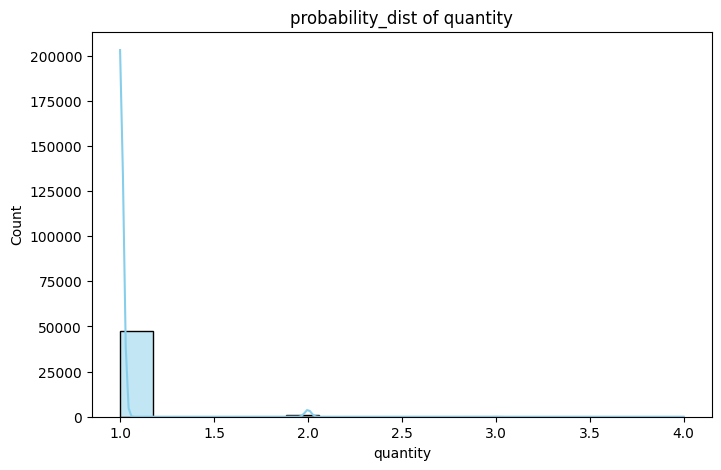

In [42]:
def probability_dist(df, column):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, color="skyblue" )
    plt.title(f"probability_dist of {column}")
    plt.show()
probability_dist(new_df, "quantity")

### Hypothesis testing 

In [50]:
import pandas as pd
from scipy import stats

def hypothesis_test(df, group_col, value_col, group1, group2, test_type='t-test', alpha=0.05):
    """
    Perform hypothesis testing on two groups within a DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data
    - group_col: column name to group by (e.g., 'category')
    - value_col: column name of the values to compare (e.g., 'total_price')
    - group1: name of the first group (e.g., 'Classic')
    - group2: name of the second group (e.g., 'Veggie')
    - test_type: type of test ('t-test', 'mannwhitney', 'anova')
    - alpha: significance level (default is 0.05)

    Returns:
    - Dictionary containing test statistic, p-value, and conclusion
    """
    data1 = df[df[group_col] == group1][value_col]
    data2 = df[df[group_col] == group2][value_col]

    if test_type == 't-test':
        stat, p = stats.ttest_ind(data1, data2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    elif test_type == 'anova':
        stat, p = stats.f_oneway(data1, data2)
    else:
        raise ValueError("Unsupported test_type. Choose 't-test', 'mannwhitney', or 'anova'.")

    result = {
        'test_statistic': stat,
        'p_value': p,
        'conclusion': 'Reject null hypothesis' if p < alpha else 'Fail to reject null hypothesis'
    }
    return result
